### 1. Carregando Bibliotecas

In [32]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [33]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


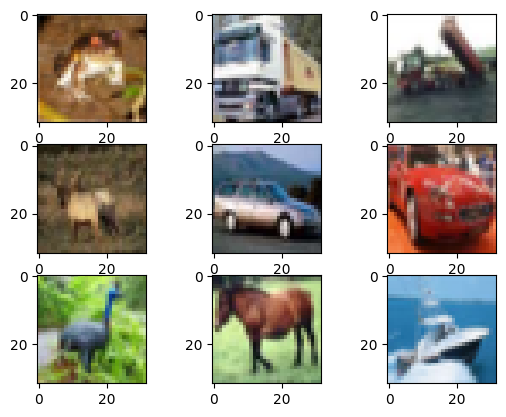

In [34]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [35]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos

In [36]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [37]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
num_classes

10

In [39]:
x_train.shape

(50000, 32, 32, 3)

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [40]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [41]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [42]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [43]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3

In [44]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(32, 32, 3)))                        
#model.add(Conv2D(32, (3,3)),  activation='relu', input_shape=(32, 32, 3)))                        

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

In [45]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

### 7. Treinando o modelo

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [47]:
checkpointer = ModelCheckpoint(filepath='./model/cifar.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
hist = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/10


2023-01-17 16:34:24.248523: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.


450/450 [==============================] - ETA: 0s - loss: 2.1452 - accuracy: 0.1826
Epoch 1: val_accuracy improved from -inf to 0.33180, saving model to ./model/cifar.hdf5
450/450 [==============================] - 10s 20ms/step - loss: 2.1452 - accuracy: 0.1826 - val_loss: 1.8995 - val_accuracy: 0.3318
Epoch 2/10
449/450 [============================>.] - ETA: 0s - loss: 1.8361 - accuracy: 0.3030
Epoch 2: val_accuracy improved from 0.33180 to 0.40200, saving model to ./model/cifar.hdf5
450/450 [==============================] - 8s 17ms/step - loss: 1.8360 - accuracy: 0.3031 - val_loss: 1.6723 - val_accuracy: 0.4020
Epoch 3/10
450/450 [==============================] - ETA: 0s - loss: 1.6795 - accuracy: 0.3685
Epoch 3: val_accuracy improved from 0.40200 to 0.47860, saving model to ./model/cifar.hdf5
450/450 [==============================] - 8s 18ms/step - loss: 1.6795 - accuracy: 0.3685 - val_loss: 1.5509 - val_accuracy: 0.4786
Epoch 4/10
450/450 [==============================] - ET

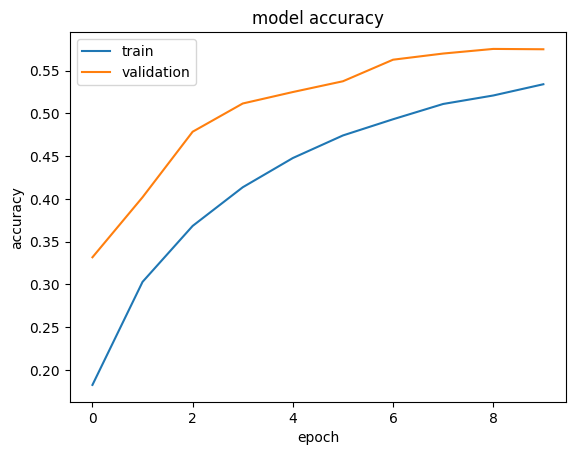

In [48]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [49]:
model = load_model("./model/cifar.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5742999911308289


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [51]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [52]:
y_hat = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [53]:
y_hat

array([[3.1161774e-02, 1.5754128e-02, 1.7148669e-01, ..., 1.0367764e-02,
        3.8121637e-02, 1.7852088e-02],
       [1.9805817e-01, 3.1223246e-01, 6.6649313e-03, ..., 2.0471232e-03,
        3.3756056e-01, 1.3760915e-01],
       [2.1393152e-01, 8.4887847e-02, 1.2229204e-02, ..., 1.4505832e-03,
        6.1808944e-01, 6.1745699e-02],
       ...,
       [1.9695438e-03, 3.6786761e-04, 6.9412462e-02, ..., 4.9654793e-02,
        1.1663826e-03, 2.4171190e-03],
       [6.5083951e-02, 5.1212656e-01, 7.8968152e-02, ..., 1.2010756e-02,
        3.2137480e-02, 8.2625315e-02],
       [3.2562700e-03, 9.4713934e-04, 9.1456525e-02, ..., 5.1558566e-01,
        5.0412095e-04, 3.6284993e-03]], dtype=float32)

In [54]:
y_hat[100,:]

array([3.21671483e-03, 1.47964922e-04, 2.59981334e-01, 8.05284679e-02,
       3.90298992e-01, 1.20418794e-01, 4.77479734e-02, 9.49010551e-02,
       1.94227358e-03, 8.16505461e-04], dtype=float32)

In [55]:
np.argmax(y_hat[100,:])

4

In [56]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

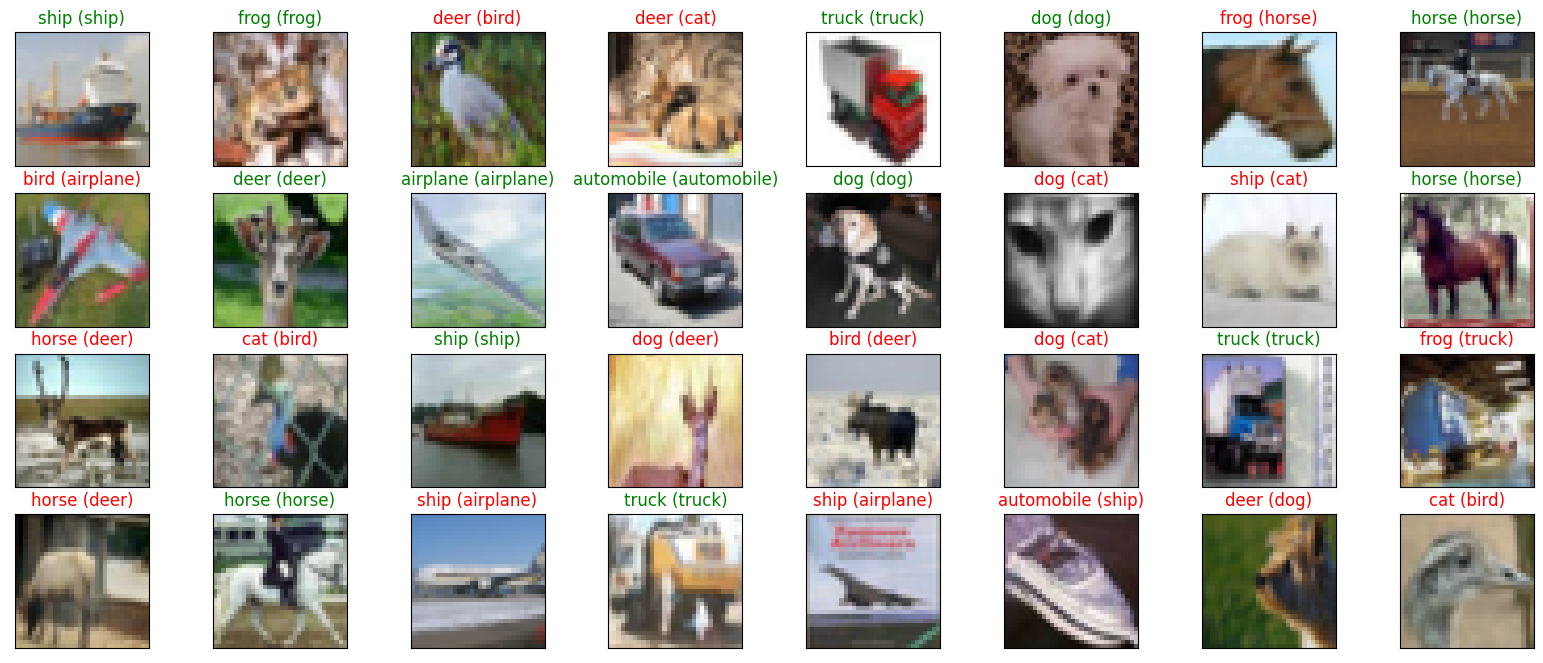

In [58]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho